In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

In [89]:
plt.style.available
plt.style.use('default')

In [90]:
raw_mobility = pd.read_csv('applemobilitytrends-2020-04-27.csv')

In [112]:
mobility = raw_mobility.melt(['region', 'transportation_type', 'geo_type', 'alternative_name'], value_name = 'value', var_name = 'date')

mobility.index = pd.to_datetime(mobility['date'])
mobility['value'] = mobility['value'].apply(lambda v: v-100)

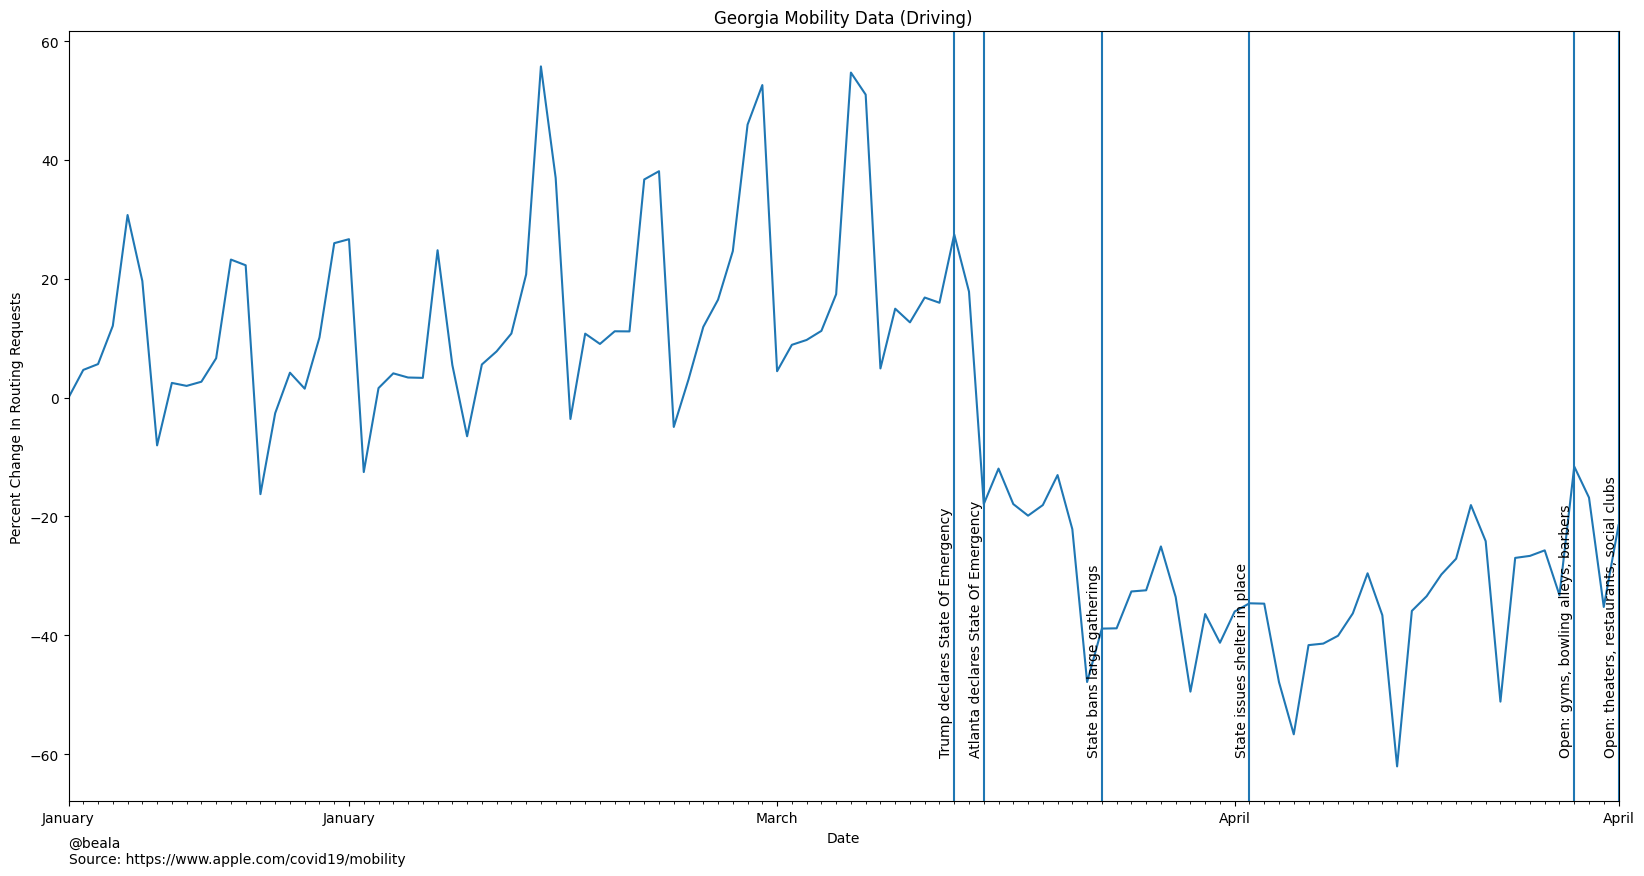

<Figure size 640x480 with 0 Axes>

In [119]:
ga = mobility[mobility['region'] == "Georgia"]['value']
ax = ga.plot(
        figsize = (20,10),
        title = 'Georgia Mobility Data (Driving)')

def event(date, label):
    plt.axvline(x=pd.to_datetime(date))
    ax.text(pd.to_datetime(date) - pd.to_timedelta('1 day'), -60, label, rotation=90)    

event('2020-03-13', 'Trump declares State Of Emergency')
event('2020-03-15', 'Atlanta declares State Of Emergency')
event('2020-03-23', 'State bans large gatherings')
event('2020-04-02', 'State issues shelter in place')
event('2020-04-24', 'Open: gyms, bowling alleys, barbers')
event('2020-04-27', 'Open: theaters, restaurants, social clubs')
#event('2020-04-30', 'Shelter in place expires')
ax.set_xlabel("Date")
ax.set_ylabel("Percent Change In Routing Requests")
ax.xaxis.set_minor_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%B'))
#ax.xaxis.set_minor_formatter(mdates.DateFormatter('%d'))
plt.figure().autofmt_xdate()

ax.text(
    0,
    -0.08,
    "@beala\nSource: https://www.apple.com/covid19/mobility",
    transform=ax.transAxes
)

plt.savefig("ga_mobility.png")